# Running simulation on Netlogo using Python

Netlogo is capable of rendering realtime visualization for the states of the agents, as well as other post-simulation statistics.
The results, however, is not suitable for presentation, let alone being published. 

This simple notebook demonstrates how we could connect Netlogo with Python, and extract data from that. 
Distribution of wealth for heterogeneous household are initialized n times, and few statistics are calculated in Netlogo, 
but plotted in Python.

In [1]:
import pyNetLogo
import numpy as np
jvm_filepath = r"C:\Program Files\NetLogo 6.2.2\runtime\bin\server\jvm.dll"
netlogo_home_path = r"C:\Program Files\NetLogo 6.2.2"
netlogo = pyNetLogo.NetLogoLink(gui=False, jvm_home=jvm_filepath, netlogo_home=netlogo_home_path)

In [3]:
nl_filepath = r"C:\Users\tedb0\Documents\111-1\Netlogo\Practice 3\3-1" + ".nlogo"
netlogo.load_model(nl_filepath)

In [4]:
def setup(n=2000):
    set_nhh(n)
    netlogo.command("setup")

def go(n=1):
    if n==1:
        netlogo.command("go")
    else:
        netlogo.repeat_command('go', n)

def set_nhh(n):
    assert isinstance(n, int)
    netlogo.command(f"set n-hh {n}")

In [5]:
netlogo.command("set n-hh 5000")
setup()

In [6]:
go()

In [11]:
max_ = netlogo.report('max-budget-list')
min_ = netlogo.report('min-budget-list')
median_ = netlogo.report('median-budget-list')
all_l = netlogo.report('all-budget-list')

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

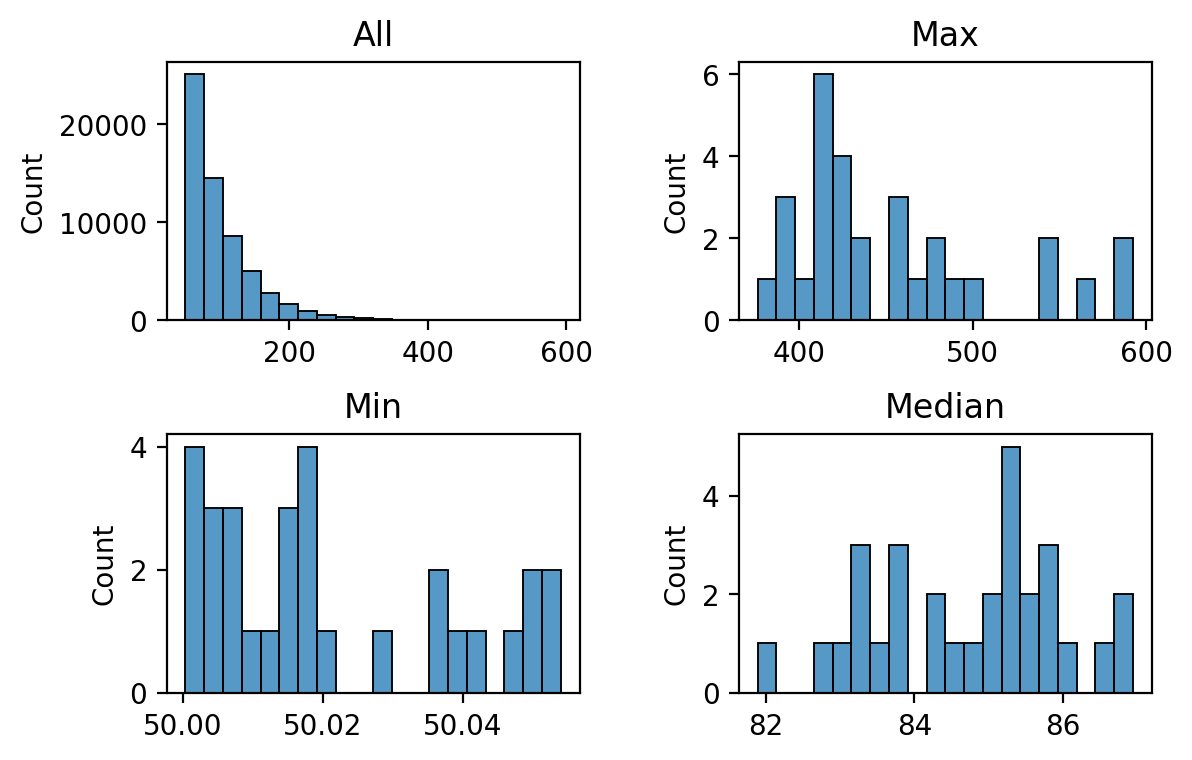

In [32]:
fig, ax = plt.subplots(2,2)
fig.tight_layout(pad=2)
fig.dpi = 200

to_plot = [all_l, max_, min_, median_]
titles =["All", "Max", "Min", "Median"]

for i in range(4):
    ix = i // 2 
    iy = i % 2
    this_ax = ax[ix, iy]
    sns.histplot(to_plot[i], bins=20, ax= this_ax)
    this_ax.set_title(titles[i])
    




# 3-2

In [59]:
import pandas as pd
import seaborn as sns

In [26]:
netlogo = pyNetLogo.NetLogoLink(gui=True, jvm_home=jvm_filepath, netlogo_home=netlogo_home_path)
nl_filepath = r"C:\Users\tedb0\Documents\111-1\Netlogo\Practice 3\Chapter 3-Practical demand.nlogo"
netlogo.load_model(nl_filepath)

In [27]:
netlogo.command("setup")

In [35]:
netlogo.command("go")

In [75]:
quintile_groups, quintile_unique = pd.factorize(netlogo.report("map [s -> [quintileGroup] of s] sort households"), sort=True)
elasticities = netlogo.report("map [s -> [priceElasticity] of s] sort households")

In [76]:
df_quintile_elas = pd.DataFrame({'Group': quintile_groups, 'Elas': elasticities})
df_quintile_elas

,Group,Elas
0,1,-0.570541
1,4,-0.232405
2,0,-0.394018
3,2,-0.372107
4,3,-0.540248
...,...,...
995,2,-0.564876
996,0,-0.641587
997,0,-0.627778
998,2,-0.643972


<AxesSubplot:xlabel='Group', ylabel='Elas'>

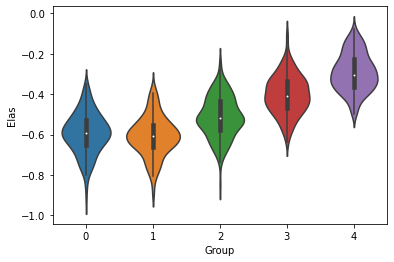

In [77]:
sns.violinplot(data = df_quintile_elas, y="Elas", x="Group")

In [78]:
df_quintile_elas.groupby("Group").agg(['mean', 'std'])

Elas          
           mean       std
Group                    
0     -0.592457  0.101561
1     -0.607337  0.097949
2     -0.512205  0.100793
3     -0.402010  0.096696
4     -0.291571  0.093271